# UNEMPLOYMENT ANALYSIS WITH PYTHON 

## Description

This project is an analysis of the unemployment rate in India. The data is cleaned and analyzed using Python. The analysis is done using the Pandas library. The data is visualized using the Matplotlib, Seaborn library.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing Dataset

In [2]:
df = pd.read_csv('Unemployment.csv')
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


Rename the columns for better understanding, as some columns give error while performing operations on them.

In [3]:
df.columns = ["Region", "Date", "Frequency",
              "Estimated Unemployment Rate",
              "Estimated Employed",
              "Estimated Labour Participation Rate",
              "Area"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


## Data Cleaning

Check for null values in the dataset.

In [6]:
df.isnull().sum()

Region                                 28
Date                                   28
Frequency                              28
Estimated Unemployment Rate            28
Estimated Employed                     28
Estimated Labour Participation Rate    28
Area                                   28
dtype: int64

Since there are a few null values in the dataset, we can drop them.

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Region                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Area                                   0
dtype: int64

The null values are dropped.

In [9]:
df2 = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
df2.corr()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
Estimated Unemployment Rate,1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate,0.002558,0.011300,1.000000


## Data Visualization

<Axes: title={'center': 'Indian Unemployment'}, xlabel='Estimated Employed', ylabel='Count'>

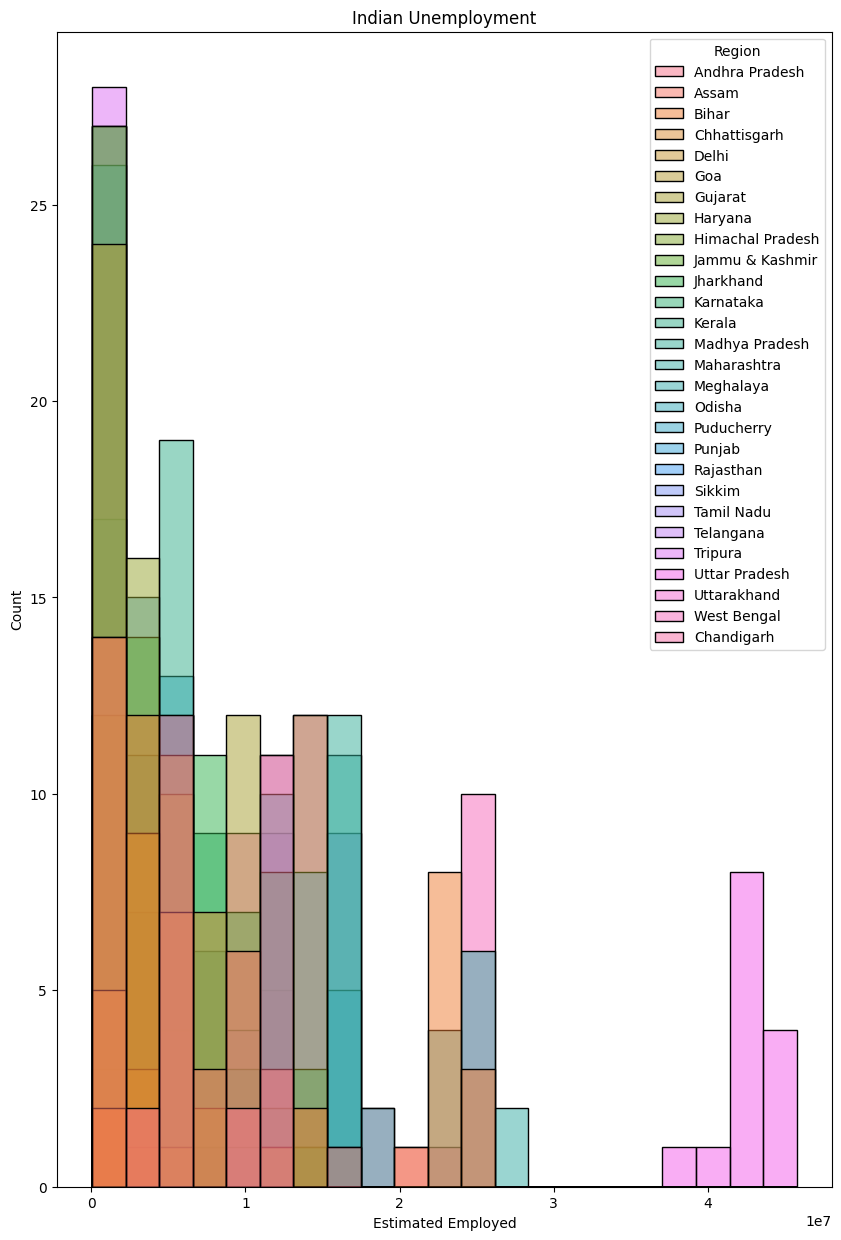

In [18]:
plt.figure(figsize=(10, 15))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)

In [11]:
unemploment = df[["Region", "Estimated Unemployment Rate", "Area"]]
figure = px.sunburst(unemploment, path=["Region", "Area"],
                     values="Estimated Unemployment Rate",
                     width=1000, height=1000,
                     title="Unemployment Rate in India")
figure.show()